# Ecommerce Customers Linear Regression Analysis
This notebook analyzes the Ecommerce Customers dataset and builds a linear regression model to predict yearly spending.

In [7]:
# Linear Regression Project¶
# Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

# The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

# Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

In [ ]:
# We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

# Avg. Session Length: Average session of in-store style advice sessions.
# Time on App: Average time spent on App in minutes
# Time on Website: Average time spent on Website in minutes
# Length of Membership: How many years the customer has been a member.

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

## Load the Ecommerce Customers Dataset
Load the CSV file 'Ecommerce Customers' into a pandas DataFrame.

In [5]:
# Load the Ecommerce Customers Dataset
df = pd.read_csv('Ecommerce Customers')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


## Explore the Dataset
Display the first few rows, check data types, and get summary statistics.

In [8]:
# Display first few rows
df.head()

# Check data types
df.info()

# Get summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


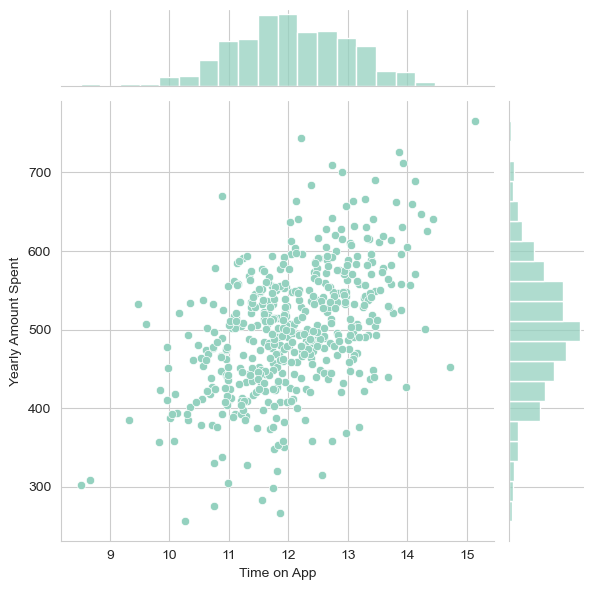

In [ ]:
# Exploratory Data Analysis (EDA)
# Let's visualize the data to understand the relationships between features and the target variable.

sns.set_palette("GnBu_d")
sns.set_style("whitegrid")
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df)
plt.show()

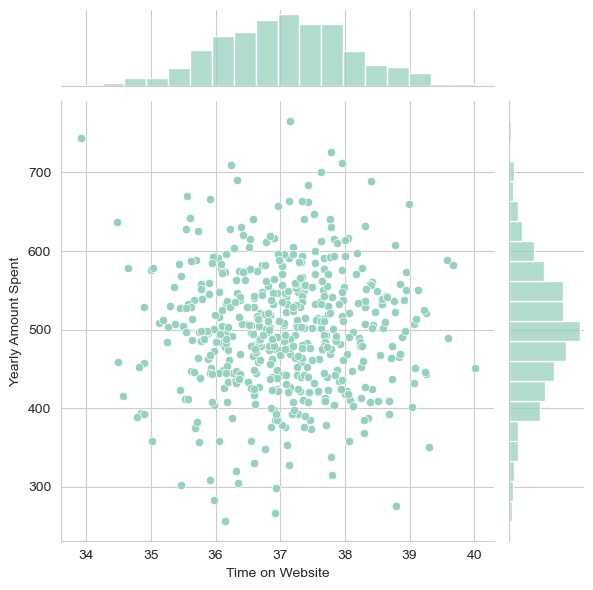

In [13]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df)
plt.show()

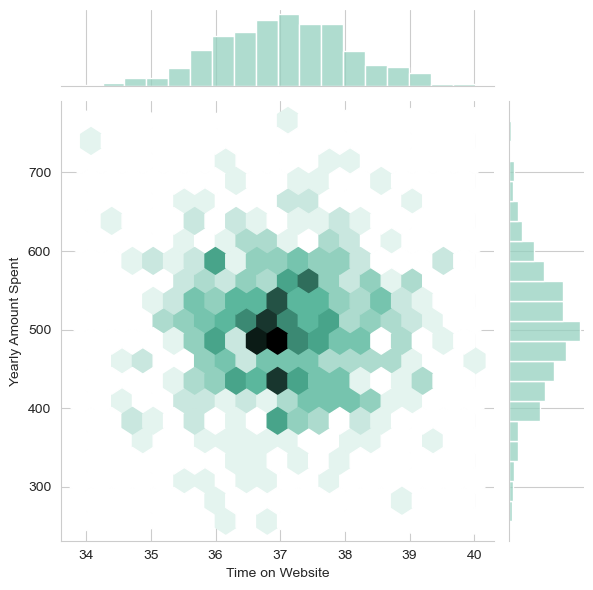

In [14]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, kind='hex')
plt.show()

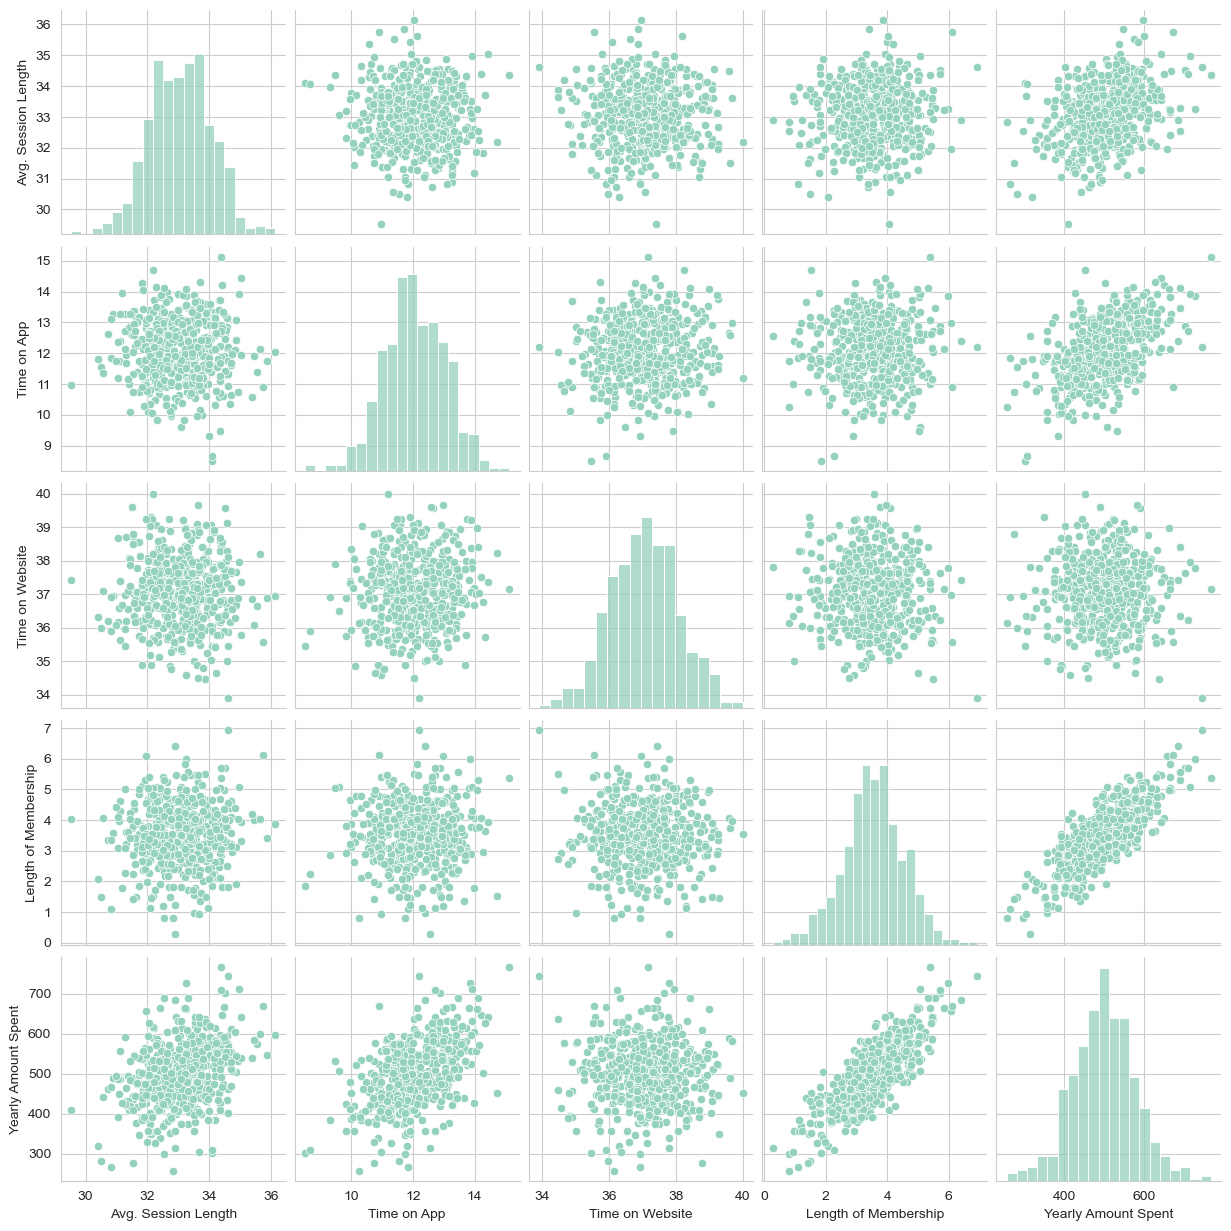

In [17]:
sns.pairplot(df)
plt.show()

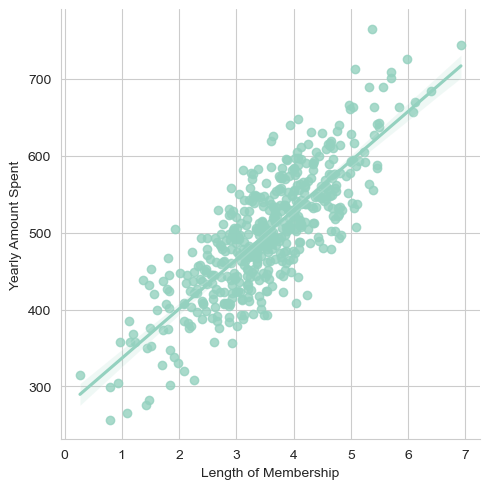

In [ ]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)
plt.show()

In [ ]:
# Training and Testing Data
# Split the data into features and target variable

In [22]:
# Select features and target variable
X = df[['Time on App', 'Time on Website', 'Length of Membership','Avg. Session Length']]
y = df['Yearly Amount Spent']
X.head()

,Time on App,Time on Website,Length of Membership,Avg. Session Length
0,12.655651,39.577668,4.082621,34.497268
1,11.109461,37.268959,2.664034,31.926272
2,11.330278,37.110597,4.104543,33.000915
3,13.717514,36.721283,3.120179,34.305557
4,12.795189,37.536653,4.446308,33.330673


In [25]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

## Train-Test Split
Split the data into training and testing sets using train_test_split from scikit-learn.

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, X_test.shape

((350, 4), (150, 4))

## Train a Linear Regression Model
Fit a LinearRegression model to the training data.

In [28]:
# Train the Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Print coefficients
print('Coefficients:', lm.coef_)

Coefficients: [38.59015875  0.19040528 61.27909654 25.98154972]


## Evaluate Model Performance
Predict on the test set and calculate metrics such as MAE, MSE, and R^2 score.

In [29]:
# Predict on the test set
y_pred = lm.predict(X_test)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

MAE: 7.23
MSE: 79.81
R^2 Score: 0.99


## Visualize Results
Plot predicted vs actual values and visualize residuals.

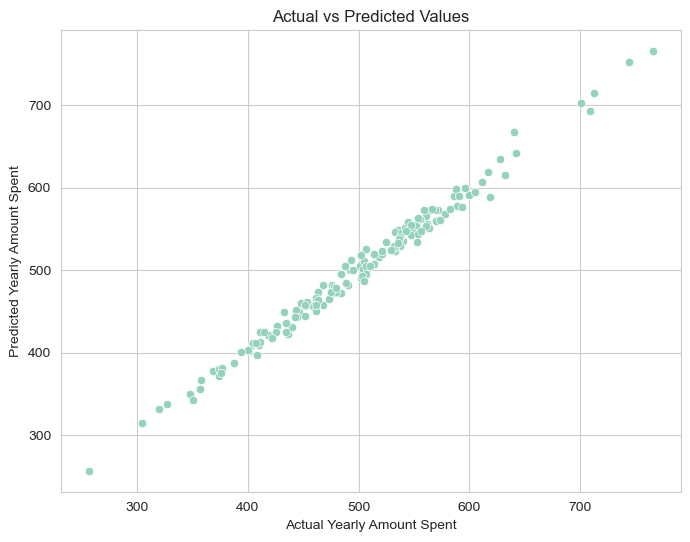

In [30]:
# Plot predicted vs actual values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs Predicted Values')
plt.show()

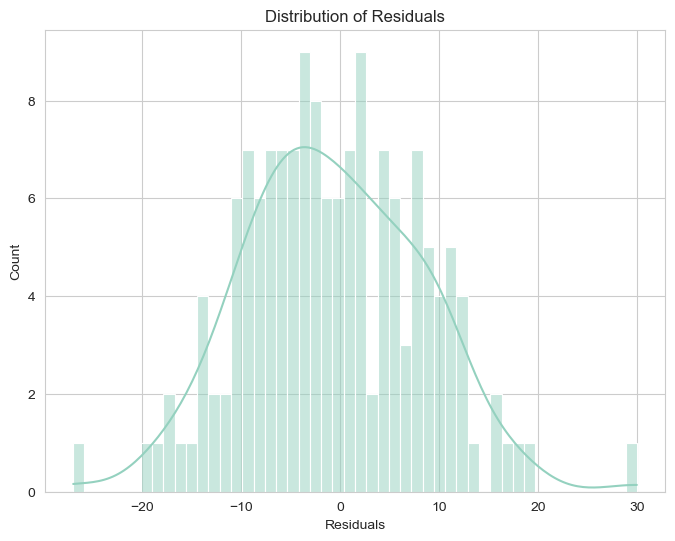

In [33]:
# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True,bins=50)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [34]:
coefficients_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [35]:
coefficients_df

,Coefficient
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
Avg. Session Length,25.981550
